#### Student Name:
#### Student ID:


# Assignment 1

### Mozart Dice Game, Fourier Transforms

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook as a PDF and your Mozart Dice Game MIDI.

Mozart Dice Game
--------------

For this section of the assignment, you will implement the Mozart Dice Game using MIDI. 

Your composition will be a 16-measure minuet using 'dice rolls' (random generation in Python). 

Please check out the interactive demo available here (http://www.playonlinedicegames.com/mozart). 

Please see the code in the cell below for an example of combining MIDI files together (since you will be combining musical cells to create your Mozart Dice Game composition). You may want to install MIT's music21 python library (http://web.mit.edu/music21/) using pip. If you would rather combine MIDI files with another method, feel free to explore. 

The MIDI files, created by Packard Humanities Institute's Center for Computer Assisted Research in the Humanities at Stanford University, can be found in a .zip archive in the assignment repository. 

The code cell below also contains the filenames of candidate phrases for each of the 16 measures of your Mozart Dice Menuet (A1-B8). Using a random 'dice roll,' you will select one of the candidates for that measure of your minuet. The final product is the stitched-together combination of all 16 measures, selected via dice roll. 

Please save a .midi file of your randomly generated minuet to submit to Gradescope.

In [ ]:
from music21 import midi as midi21
from music21 import stream
import copy
import music21
import soundfile as sf
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
from scipy import signal
import librosa
%matplotlib inline
import IPython.display as ipydisplay
from IPython.display import Audio, display

def play(x):
    """Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """  
    if isinstance(x, stream.Stream):
        x = copy.deepcopy(x)
        for subStream in x.recurse(streamsOnly=True, includeSelf=True):
            mss = subStream.getElementsByClass(stream.Measure)
            for ms in mss:
                ms.offset += 1.0
    if isinstance(x, music21.note.Note):
        s = stream.Stream()
        s.append(music21.note.Rest(1))
        s.append(x)
        x = s
    x.show('midi')

mf1 = midi21.MidiFile()
mf1.open("mozartdicegame/cda001.mid")
mf1.read()
mf1.close()
s1 = midi21.translate.midiFileToStream(mf1)

mf2 = midi21.MidiFile()
mf2.open("mozartdicegame/cda002.mid")
mf2.read()
mf2.close()
s2 = midi21.translate.midiFileToStream(mf2)

myStream = stream.Stream()
myStream.append(s1)
myStream.append(s2)
play(myStream)
myStream.write('midi', fp='combined_midi.mid')


A1 = "070 010 033 036 105 165 007 142 099 085 145"
A2 = "014 064 001 114 150 152 081 106 068 045 097"
A3 = "164 100 160 008 057 112 131 040 086 090 006"
A4 = "122 012 163 035 071 015 037 069 139 158 121"
A5 = "025 149 077 111 117 147 021 043 120 082 056"
A6 = "153 030 156 039 052 027 125 140 092 123 067"
A7 = "018 161 168 137 132 073 049 023 143 078 063" 
A8 = "167 011 172 044 130 102 115 089 083 058 016"

B1 = "155 148 022 004 136 144 116 066 093 061 050"
B2 = "003 028 176 157 091 104 133 124 055 034 079" 
B3 = "162 135 062 038 138 087 072 026 029 119 175" 
B4 = "170 173 126 009 019 107 141 084 051 046 076" 
B5 = "013 169 031 151 134 128 094 075 042 059 113" 
B6 = "166 174 024 032 101 048 080 103 110 054 088" 
B7 = "095 002 159 017 154 109 129 096 108 060 053" 
B8 = "005 020 041 171 146 074 065 127 098 047 118" 


##### Question 1 (Including Output MIDI) [15 points]

In [ ]:
### Your Mozart Dice Game implementation here:
import random

list_of_measures = [A1, A2, A3, A4, A5, A6, A7, A8, B1, B2, B3, B4, B5, B6, B7, B8]
path_prefix = 'mozartdicegame/cda'
path_suffix = '.mid'

selected_bars = []

mozart_stream = stream.Stream()

for bar_list in list_of_measures:
    bar_list = bar_list.split(' ')
    idx = random.randint(0,10)
    random_bar = bar_list[idx]
    selected_bars.append(random_bar)
    mf = midi21.MidiFile()
    path = path_prefix + random_bar + path_suffix
    mf.open(path)
    mf.read()
    mf.close()
    s = midi21.translate.midiFileToStream(mf)
    mozart_stream.append(s)

play(mozart_stream)
mozart_stream.write('midi', fp='mozart_dice_game.mid')


Fourier Transform
--------------

The Discrete Fourier Transform (DFT) is the primary analysis tool for digital signal processing. By using matrix/vector representation, the DFT can be understood as a transformation of digital signals into a new vector space.

In this space  the columns of the DFT are the basis vectors. One important idea is that we call these vectors as "frequencies", but mathematically they simply represent the original data in a different space.

This is the mathematical definition of DFT matrix

$$ \mathbf{U} = \frac{1}{\sqrt N} \left[ \exp \left( j \frac{2\pi}{N} n k \right) \right]_{n\in\{0,N_s-1\},k\in\{0,N-1\}} $$


where $n$ counts the samples as rows and $k$ indexes the discrete frequencies (which are our new basis) as columns. 

##### Question 2 [15 points]

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    
    ### Implement the DFT matrix (U) here
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    
    return U/np.sqrt(Nfft)

Nfft=8
Ns=8
U = dftmatrix(Nfft=Nfft,N=Ns)

We can plot these basis as pairs of real and imaginary vectors

Text(0.5, 0, 'n')

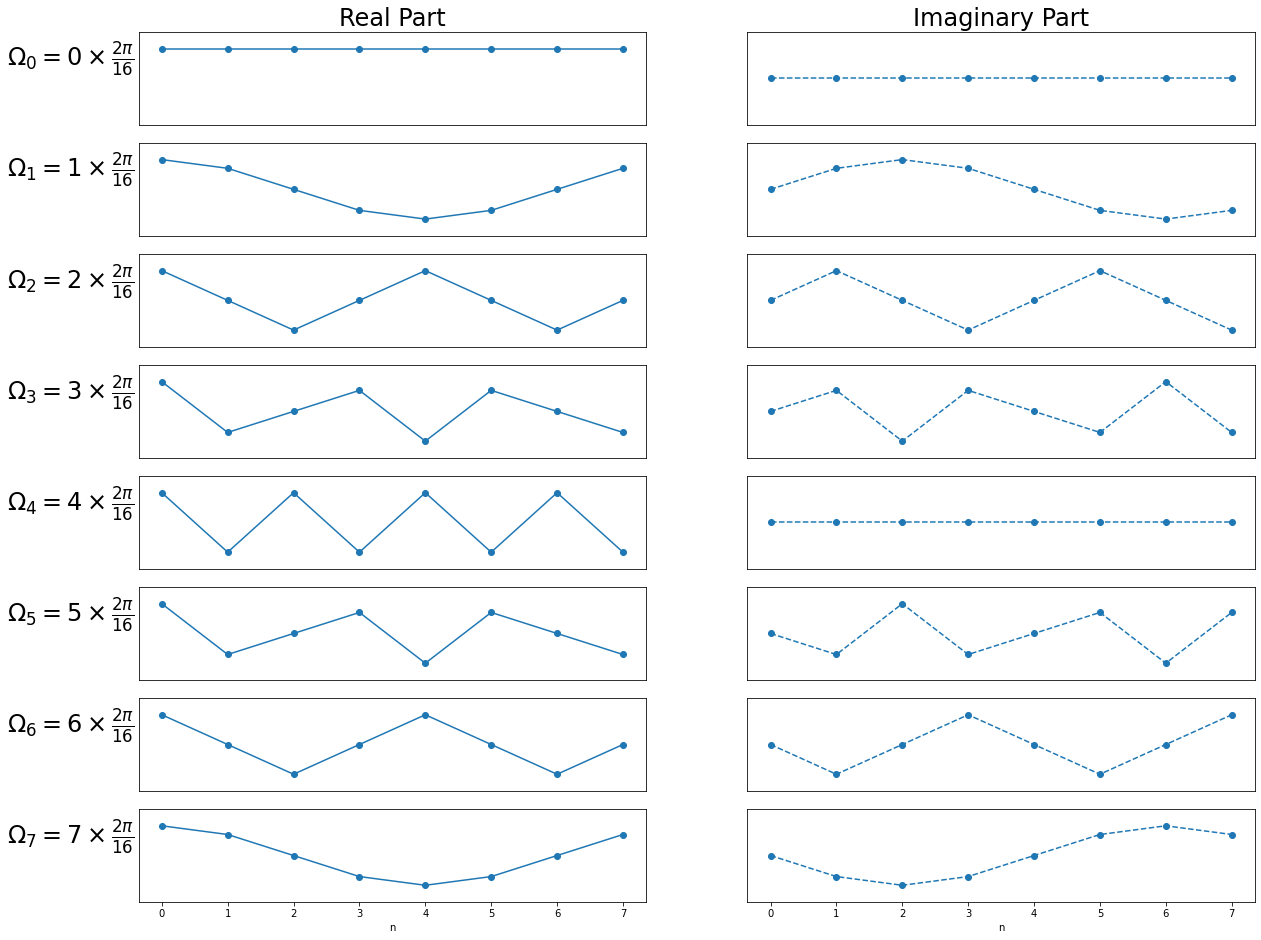

In [8]:
plt.rcParams['figure.figsize'] = (20, 16)

# plots in the left column
plt.subplot(Nfft,2,1)
plt.title('Real Part',fontsize=24)

for i in range(Nfft):
    plt.subplot(Nfft,2,2*i+1)
    plt.xticks([]);  plt.yticks([])
    plt.ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{16}$'%(i,i),fontsize=24, 
        rotation='horizontal',horizontalalignment='right')
    plt.plot(np.array(U.real[:,i]),'-o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

# plots in the  right column
plt.subplot(Nfft,2,2)
plt.title('Imaginary Part',fontsize=24)

for i in range(Nfft):
    ax=plt.subplot(Nfft,2,2*(i+1))
    plt.xticks([]);  plt.yticks([])
    plt.plot(np.array(U.imag[:,i]),'--o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

##### Question 3 [5 points]

What do you observe in the above plots, considering symmetries and the relationship between real & imaginary parts?

``Your response here``

Possible answers include:
* The Real and Imaginary parts are shifted by 90 degrees
* Nyquist relations can be seen directly from observing the vectors - the frequencies are symmetric around Nfft/2 for the Real part and anti-symmetric for Imaginary part. This eventually leads to the fact that we have only Nfft/2 frequencies.

Other properties that curious students may make note: 
* The vectors are orthogonal (dot product of different vectors is zero)
* The inverse of DFT is conjugate transpose of DFT

Computing the DFT
--------------------

To compute the DFT using the matrix, we calculate the following,

$$ \mathbf{X} = \mathbf{U}^H \mathbf{x}$$

which individually takes each of the columns of $\mathbf{U}$ and computes the inner product as the $i^{th}$ entry,

$$ \mathbf{X}_i = \mathbf{U}_i^H \mathbf{x}$$

That is, we are measuring the *degree of similarity* between each column of $\mathbf{U}$ and the input vector. We can think of this as the coefficient of the projection of $\mathbf{x}$ onto  $\mathbf{u}_i$.

We can retrieve the original input from the DFT by calculating

$$ \mathbf{x} = \mathbf{U} \mathbf{U}^H \mathbf{X} $$

### Example: finding a frequency of a signal

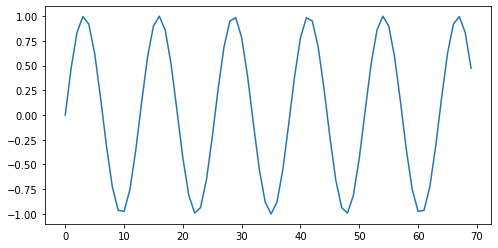

In [14]:
plt.rcParams['figure.figsize'] = (8, 4)

Ns = 70
freq = 5.5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)
plt.plot(x)
plt.show()

##### Question 4 [10 points]

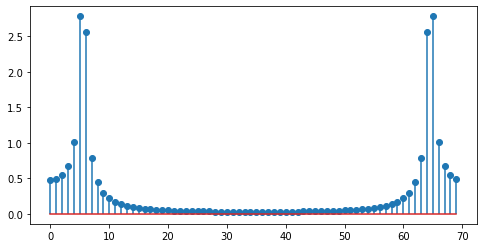

In [15]:
Nfft = Ns
U = dftmatrix(Nfft=Nfft,N=Ns)
x = np.matrix(x)

### Compute X, the DFT of signal x
X = U.T*x.T


plt.stem(np.array(abs(X)))
plt.show()

##### Question 5 [5 points]

Where do you observe peaks in the DFT plot? How would you describe the DFT plot symmetry? 

``Your response here``

Example Response: 
The plot has a peak at 5.5, the frequency of the signal x. There is another peak at 64.5. 
For a real input signal of N points, the FFT will give a complex output of N points with complex conjugate symmetry about N/2. The output points above N/2 provide no useful additional information for a real input signal; that is, for a single sine wave we observe peaks at bins n and N - n. The N/2 useful complex output bins from the FFT represent frequencies from DC (0 Hz) to Nyquist (Fs / 2). 

## Extra: Windowing function

In this section we will revisit the frequency analysis, this time with different windowing functions.

The points we will demonstrate are as follows:
* Notice the difference between fft analysis of signals that fall on the frequency grid and those who are in-between. Why we see an ideal single peak in one case and multiple peaks in the other case?
* What happens if we increase the order of the DFT to match the 'in-between' freqeuncy? 
* Recap of the convolution/multiplication duality between time/frequency representations
* understand the sidelobes of different windows and how it explains the effect we have seen in the first case.

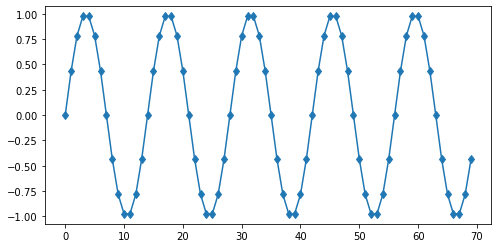

In [34]:
plt.rcParams['figure.figsize'] = (8, 4)

Ns = 70
freq = 5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)
plt.plot(x,'-d')
plt.show()

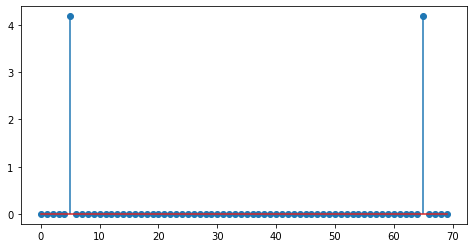

In [18]:
x = np.matrix(x)
X = U.T*x.T

plt.stem(np.array(abs(X)))
plt.show()

###### Question (Class discussion): 
Why do we see an ideal peak?

Lets solve the 'in between' frequency issue by increasting the DFT size

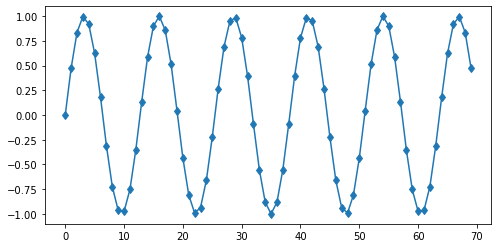

In [121]:
Ns = 70
freq = 5.5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)
plt.plot(x,'-d')
plt.show()

Lets "zero-pad" the original signal so we can use a longer DFT. 

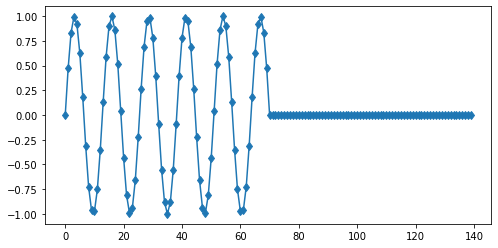

In [122]:
Ns = 70
freq = 5.5/Ns
x = np.zeros((2*Ns,))
t = np.arange(Ns)
for i, ti in enumerate(t):
    x[i] = np.sin(2*np.pi*freq*ti)

plt.plot(x,'-d')
plt.show()

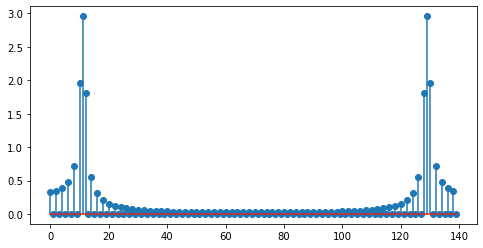

In [123]:
Nfft = 2*Ns
U = dftmatrix(Nfft=Nfft,N=2*Ns)
x = np.matrix(x)

### Compute X, the DFT of signal x
X = U.T*x.T


plt.stem(np.array(abs(X)))
plt.show()

##### Question:
Why we still have the clutter around? 

You guessed right, since the sinusoid was truncated, the ubrupt change causes artifacts. Had we done the DFT for a complete signal, things would have been looking much better (ideal ;)

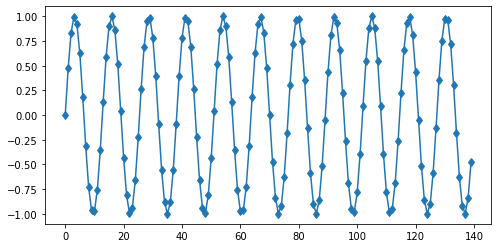

In [124]:
Ns = 70
freq = 5.5/Ns
t = np.arange(2*Ns)
x = np.sin(2*np.pi*freq*t)

plt.plot(x,'-d')
plt.show()

<StemContainer object of 3 artists>

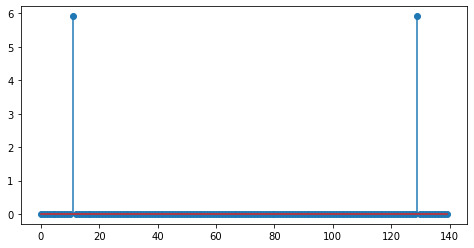

In [125]:
Nfft = 2*Ns
U = dftmatrix(Nfft=Nfft,N=2*Ns)
x = np.matrix(x)

### Compute X, the DFT of signal x
X = U.T*x.T


plt.stem(np.array(abs(X)))

### Windowing Effect
This is what windwing effect does. Lets for now only focus on the window:

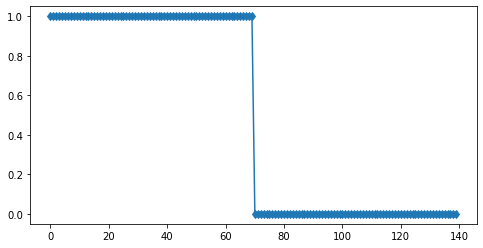

(140,)

In [55]:
Ns = 70
win = np.zeros((2*Ns,))
t = np.arange(Ns)
for i, ti in enumerate(t):
    win[i] = 1

plt.plot(win,'-d')
plt.show()
np.shape(win)

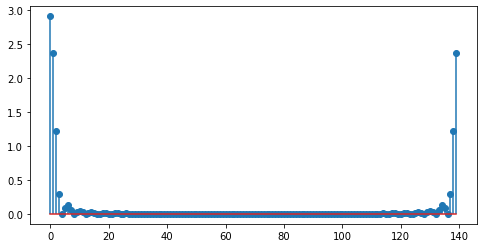

In [126]:
Nfft = 2*Ns
U = dftmatrix(Nfft=Nfft,N=2*Ns)
win = np.matrix(win)

### Compute X, the DFT of signal x
W = U.T*win.T


plt.stem(np.array(abs(W)))
plt.show()

Or even better, center the window freqeuncy response so anything above Nyguist is negative

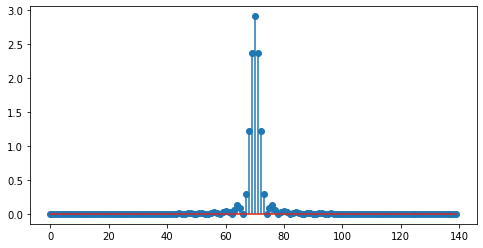

In [127]:
plt.stem(np.array(np.roll(abs(W),int(Ns), axis=0)))
plt.show()

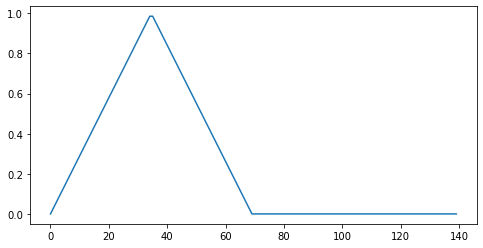

(140,)

In [130]:
win = np.zeros((2*Ns,))
win[np.arange(Ns)] = np.bartlett(Ns)
plt.plot(win,'-')
plt.show()
np.shape(win)

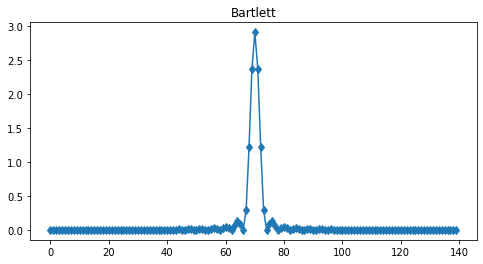

In [131]:
win = np.matrix(win)

### Compute X, the DFT of signal x
W = U.T*win.T
plt.plot(np.array(np.roll(abs(W),int(Ns), axis=0)),'-d')
plt.title("Bartlett")
plt.show()


Let's explore couple other windows:

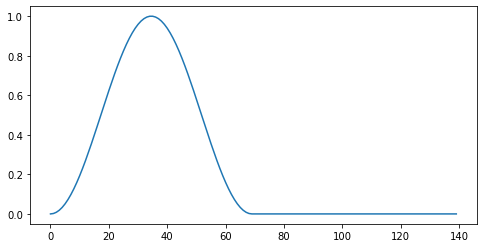

(140,)

In [128]:
Ns = 70
win = np.zeros((2*Ns,))
win[np.arange(Ns)] = np.hanning(Ns)
plt.plot(win,'-')
plt.show()
np.shape(win)

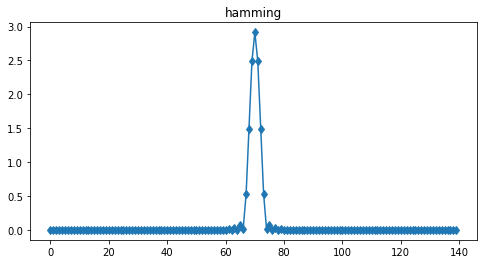

In [129]:
win = np.matrix(win)

### Compute X, the DFT of signal x
W = U.T*win.T
plt.plot(np.array(np.roll(abs(W),int(Ns), axis=0)),'-d')
plt.title("hamming")
plt.show()
